In [21]:
import tensorflow as tf
from tensorflow import keras
import os
from glob import glob
import matplotlib.pyplot as plt
import cv2

In [22]:
# Set the training path and validation path

train_path = '../data/processed/data_Lung_Infection/train/'
validation_path = '../data/processed/data_Lung_Infection/test/'

In [23]:
train_path.iterdir()

AttributeError: 'str' object has no attribute 'iterdir'

In [24]:
os.listdir(train_path)

['Type 1 disease', '.DS_Store', 'Healthy', 'Type 2 disease']

In [26]:

for images in os.listdir(os.path.join(train_path, 'Healthy')):
 
    # check if the image ends with png
    if (images.endswith(".jpg")):
        print(images)

## Image Vidualization

In [27]:
print("Training set:\n------------")

num_Healthy = len(os.listdir(os.path.join(train_path, 'Healthy')))
num_Type1 = len(os.listdir(os.path.join(train_path, 'Type 1 disease')))
num_Type2 = len(os.listdir(os.path.join(train_path, 'Type 2 disease')))
print(f"Healthy= {num_Healthy}")
print(f"num_Type1= {num_Type1}")
print(f"num_Type1= {num_Type2}")

print("\n")

print("Validation set:\n------------")

num_Healthy = len(os.listdir(os.path.join(validation_path, 'Healthy')))
num_Type1 = len(os.listdir(os.path.join(validation_path, 'Type 1 disease')))
num_Type2 = len(os.listdir(os.path.join(validation_path, 'Type 2 disease')))
print(f"Healthy= {num_Healthy}")
print(f"num_Type1= {num_Type1}")
print(f"num_Type1= {num_Type2}")


Training set:
------------
Healthy= 70
num_Type1= 102
num_Type1= 70


Validation set:
------------
Healthy= 20
num_Type1= 23
num_Type1= 20


Healthy


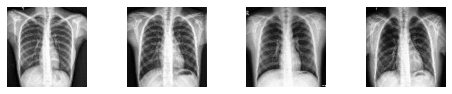

In [63]:
multipleImages = glob('../data/processed/data_Lung_Infection/train/Healthy/**')
print("Healthy")
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for l in multipleImages[:4]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(1,5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); 
    plt.axis('off')
    i_ += 1


Type 1 disease


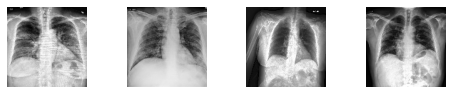

In [61]:
multipleImages = glob('../data/processed/data_Lung_Infection/train/Type 1 disease/**')
print("Type 1 disease")
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for l in multipleImages[:4]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(2,5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); 
    plt.axis('off')
    i_ += 1

Type 2 disease


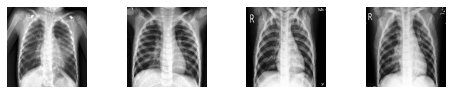

In [62]:
multipleImages = glob('../data/processed/data_Lung_Infection/train/Type 2 disease/**')
print("Type 2 disease")
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for l in multipleImages[:4]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(2,5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); 
    plt.axis('off')
    i_ += 1

In [17]:
#Initialize Glob to interact with storage

# image_files = glob(train_path +'/*/*.jp*g')
image_files = glob(train_path)
valid_image_files = glob(validation_path +'/*/*.jp*g')

In [18]:
image_files

['../data/processed/data_Lung_Infection/train/']

In [16]:
for image in image_files:
        image_arr = cv2.imread(os.path.join(folder_path, image))

[ WARN:0@1932.053] global /Users/runner/miniforge3/conda-bld/libopencv_1658893793880/work/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../data/processed/data_Lung_Infection/train/Type 2 disease/../data/processed/data_Lung_Infection/train/Type 1 disease/COVID-00006.jpg'): can't open/read file: check file path/integrity
[ WARN:0@1932.053] global /Users/runner/miniforge3/conda-bld/libopencv_1658893793880/work/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../data/processed/data_Lung_Infection/train/Type 2 disease/../data/processed/data_Lung_Infection/train/Type 1 disease/COVID-00012.jpg'): can't open/read file: check file path/integrity
[ WARN:0@1932.053] global /Users/runner/miniforge3/conda-bld/libopencv_1658893793880/work/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../data/processed/data_Lung_Infection/train/Type 2 disease/../data/processed/data_Lung_Infection/train/Type 1 disease/06.jpeg'): can't open/read file: check file path/integri

In [6]:
#Preprocessing --- Goal to make the data compatible for CNN input
# In tensorflow, you can achieve the same using ImageGenerators


train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1.0/255.,
                                                                  rotation_range=90,
                                                                  zoom_range=0.2,
                                                                  horizontal_flip=True,
                                                                  vertical_flip=True)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1.0/255.)

In [7]:
#Pass the images through the generator

trainImageData = train_generator.flow_from_directory(train_path,
                                                     batch_size=32, #how many images to give per iteration in an epoch
                                                     class_mode="categorical", #Incase of multi-class classification, "categorical"
                                                     target_size=(64,64) #Ensures all images are of same size (resizing)
                                                     ) 


testImageData = test_generator.flow_from_directory(validation_path,
                                                     batch_size=32, #how many images to give per iteration in an epoch
                                                     class_mode="categorical", #Incase of multi-class classification, "categorical"
                                                     target_size=(64,64) #Ensures all images are of same size (resizing)
                                                     ) 

Found 242 images belonging to 3 classes.
Found 63 images belonging to 3 classes.


In [8]:
print(trainImageData.image_shape)
print(testImageData.image_shape)

(64, 64, 3)
(64, 64, 3)


In [15]:
trainImageData.class_indices


{'Healthy': 0, 'Type 1 disease': 1, 'Type 2 disease': 2}

In [17]:
#trainImageData.filenames

TypeError: unhashable type: 'numpy.ndarray'

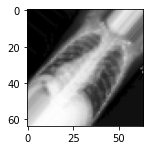

In [22]:
plt.figure(figsize=(15,15))
class_names = trainImageData.class_indices

for images,labels in trainImageData:
    for i in range(32):
        ax=plt.subplot(6,6,i+1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [25]:
class_names['Healthy']

0

In [12]:
# ARchitect the model

model = tf.keras.models.Sequential()

#Convolution Layer
#================================================================================================================================================
#First Convolution Layer

#Conv2D(noFeatureMap, kernelShape, inputShape, activation, padding) Here same means add one pad layer

model.add(tf.keras.layers.Conv2D(32 , (3,3) , input_shape= trainImageData.image_shape , activation= 'relu' , padding='same' )) #Convolve
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #Pooling 

#Second Convolution Layer

#Conv2D(noFeatureMap, kernelShape, inputShape, activation, padding) Here same means add one pad layer

model.add(tf.keras.layers.Conv2D(16 , (3,3), activation= 'relu' , padding='same' )) #Convolve
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #Pooling 

#=================================================================================================================================================
# Flatten

model.add(tf.keras.layers.Flatten())

#=================================================================================================================================================
# ANN
model.add(tf.keras.layers.Dense(units= 4096 , activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units= 1024, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units= 256, activation="relu"))
model.add(tf.keras.layers.Dense(units= 1 , activation="sigmoid"))

2022-07-31 13:08:00.703900: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-31 13:08:00.704911: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 4096)              1

In [14]:
#Compile

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [18]:
# Fit the model

model.fit(trainImageData,
          validation_data=testImageData,
          epochs=10,
          steps_per_epoch = len(trainImageData.filenames) // trainImageData.batch_size,
          validation_steps= len(testImageData.filenames) // testImageData.batch_size)

Epoch 1/10
7/7 [==============================] - ETA: 0s - loss: 1.5535 - accuracy: 0.6469

2022-07-31 13:19:12.933592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 7s 702ms/step - loss: 1.5535 - accuracy: 0.6469 - val_loss: 1.2988 - val_accuracy: 0.6667
Epoch 2/10
7/7 [==============================] - 5s 739ms/step - loss: 1.0719 - accuracy: 0.6743 - val_loss: 1.1035 - val_accuracy: 0.6667
Epoch 3/10
7/7 [==============================] - 5s 753ms/step - loss: 1.1089 - accuracy: 0.6667 - val_loss: 1.1192 - val_accuracy: 0.6667
Epoch 4/10
7/7 [==============================] - 5s 737ms/step - loss: 1.0423 - accuracy: 0.6667 - val_loss: 1.1415 - val_accuracy: 0.6198
Epoch 5/10
7/7 [==============================] - 5s 740ms/step - loss: 1.1745 - accuracy: 0.6423 - val_loss: 1.1304 - val_accuracy: 0.3333
Epoch 6/10
7/7 [==============================] - 5s 710ms/step - loss: 1.0815 - accuracy: 0.5753 - val_loss: 1.1047 - val_accuracy: 0.6302
Epoch 7/10
7/7 [==============================] - 5s 745ms/step - loss: 1.1058 - accuracy: 0.5845 - val_loss: 1.1039 - val_accuracy: 0.5885
Epoch 8/10
7/7 [===============